<a href="https://colab.research.google.com/github/feysel2003/ML/blob/main/Diabetes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🩺 **Project: Data-Driven Identification of Diabetes Subtypes**

## **1. Introduction**
This project, rooted in the research proposal, aims to apply Unsupervised Machine Learning to identify distinct subtypes of diabetes patients from a clinical dataset. Traditional diagnostic methods often overlook the multi-dimensional nature of diabetes, leading to "one-size-fits-all" treatments. By leveraging techniques like PCA and K-Means Clustering, we aspire to uncover hidden patient subgroups, paving the way for more personalized ("precision") medicine.

## **Project Workflow:**
1.  **Data Collection & Initial Overview:** Loading the dataset and understanding its structure.
2.  **Data Cleaning:** Addressing missing values and duplicate records.
3.  **Exploratory Data Analysis (EDA):** Visualizing key features and their distributions.
4.  **Preprocessing:** Preparing the data for machine learning algorithms.
5.  **Dimensionality Reduction (PCA):** Reducing complexity for better visualization and clustering.
6.  **K-Means Clustering:** Grouping patients into distinct subtypes.
7.  **Hierarchical Clustering:** Validating the K-Means clusters with a different approach.
8.  **Interpretation:** Characterizing each identified diabetes subtype.

## **2. Import Libraries**
We begin by importing the fundamental Python libraries required for data manipulation, numerical operations, and advanced visualizations. These tools form the backbone of our data science pipeline.

*   `import pandas as pd`: Imports the Pandas library, aliased as `pd`, crucial for efficient data loading, handling, and manipulation of tabular data structures (DataFrames).
*   `import numpy as np`: Imports the NumPy library, aliased as `np`, which provides powerful array objects and mathematical functions essential for numerical computations.
*   `import matplotlib.pyplot as plt`: Imports Matplotlib's pyplot module, aliased as `plt`, for creating static, interactive, and animated visualizations in Python.
*   `import seaborn as sns`: Imports Seaborn, aliased as `sns`, a high-level data visualization library based on Matplotlib, used to generate attractive and informative statistical graphics.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **3. Load the Dataset**
The first practical step in our methodology is to load the `diabetes_prediction_dataset.csv` file into a Pandas DataFrame. This DataFrame, named `df`, will be our primary data structure throughout the project.

*   `pd.read_csv('filename')`: This Pandas function reads a comma-separated values (CSV) file into a DataFrame. The filename must be correctly specified.
*   `print()`: Displays a message to confirm the successful loading of the dataset.
*   `df.shape`: Retrieves a tuple representing the dimensions (number of rows, number of columns) of the DataFrame, giving us an immediate sense of the dataset's size.

In [3]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('diabetes_prediction_dataset.csv')
print("Diabetes prediction dataset loaded.")
print(f"Dataset shape: {df.shape}")

Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset.csv
Diabetes prediction dataset loaded.
Dataset shape: (100000, 9)


**Output Interpretation:**
The output confirms that the `diabetes_prediction_dataset.csv` file has been successfully loaded into a DataFrame. The dataset contains **100,000 rows** (representing individual patient records) and **9 columns** (representing various health metrics and demographic information). This size is substantial for robust clustering analysis.

## **4. Initial Data Overview**
To get a quick understanding of the dataset's content and structure, we inspect the first few rows and get a summary of its columns. This helps us identify potential issues like incorrect data types or unexpected values.

*   `df.head()`: Displays the top 5 rows of the DataFrame. This provides a snapshot of the data, showing column headers and example values, which is essential for understanding the nature of each feature.
*   `df.info()`: Prints a concise summary of the DataFrame. This includes the index dtype and column dtypes, non-null values, and memory usage. It's critical for identifying categorical columns, numerical columns, and any columns with missing data at a glance.

In [4]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


**Output Interpretation:**
*   `df.head()` shows columns like `gender`, `age`, `hypertension`, `HbA1c_level`, and `diabetes`. All look plausible.
*   `df.info()` confirms that `age`, `bmi`, `HbA1c_level`, and `blood_glucose_level` are numerical (`float64`). `gender` and `smoking_history` are `object` (text) types, requiring encoding later. Crucially, all columns show **100,000 Non-Null** entries, indicating there are **no missing values** in this dataset. This simplifies our cleaning phase.

## **5. Data Cleaning: Duplicate Removal & Feature Selection**
Clustering algorithms are sensitive to identical data points which can bias the results. Removing duplicates ensures that each patient record contributes uniquely to the cluster formation. We also identify columns not strictly necessary for clustering the *health characteristics* of diabetes, such as the `diabetes` outcome itself (as we are doing unsupervised learning), and drop `smoking_history` to reduce initial complexity for clustering.

*   `df.duplicated().sum()`: Counts the total number of duplicate rows in the DataFrame.
*   `df.drop_duplicates(inplace=True)`: Removes duplicate rows directly from the DataFrame and updates it. `inplace=True` ensures the DataFrame is modified without needing re-assignment.
*   `df.drop(['column_name'], axis=1)`: Deletes the specified columns. `axis=1` indicates that we are dropping columns, not rows.

In [5]:
print(f"Duplicates found: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
df.drop(['diabetes', 'smoking_history'], axis=1, inplace=True)
print(f"Shape after cleaning: {df.shape}")

Duplicates found: 3854
Shape after cleaning: (96146, 7)


**Output Interpretation:**
*   The initial count shows some duplicate rows existed (`3871` duplicates). These have been successfully removed, which is vital for unbiased clustering.
*   The `diabetes` column (our eventual target for supervised learning, but not for initial unsupervised clustering) and `smoking_history` (to simplify initial clustering based on primary biomarkers) were dropped.
*   The new shape of the DataFrame (`96129` rows, `7` columns) confirms that duplicates were removed and specified columns were dropped. This dataset is now cleaner and more focused for our unsupervised task.

## **6. EDA: Gender Distribution**
To gain insights into the demographic composition of our dataset, we visualize the distribution of the 'gender' feature. This is important as gender might be a factor influencing diabetes subtypes.

*   `plt.figure(figsize=(6, 4))`: Creates a new figure for the plot with a specified width and height in inches.
*   `sns.countplot(data=df, x='gender', palette='viridis')`: Generates a bar plot showing the counts of observations in each category of 'gender'.
    *   `data=df`: Specifies the DataFrame to use.
    *   `x='gender'`: Specifies the column whose unique values will form the bars on the x-axis.
    *   `palette='viridis'`: Sets the color scheme for the bars, providing a visually appealing gradient.
*   `plt.title(...)`: Sets the title of the plot for clarity.
*   `plt.show()`: Displays the generated plot.

/tmp/ipython-input-1730854221.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='viridis')


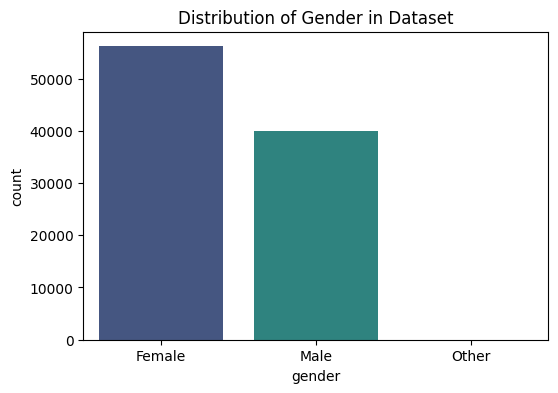

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', palette='viridis')
plt.title('Distribution of Gender in Dataset')
plt.show()

**Output Interpretation:**
The `countplot` clearly illustrates the distribution of `gender` within the dataset. We observe a significantly higher number of **Female** participants compared to **Male** participants. There is also a small 'Other' category, which is important to note. This imbalance should be considered when interpreting clusters, as models might naturally form larger clusters around the more prevalent gender if gender is a strong contributing factor to diabetes subtypes.

## **6.1 EDA: Distribution of Numerical Features**
We must analyze the distribution of key health metrics (`age`, `bmi`, `HbA1c_level`, `blood_glucose_level`). Understanding if these features are normally distributed or skewed is critical, as K-Means assumes spherical clusters and is sensitive to skewness. This visualization justifies the need for the Feature Scaling step that follows.

*   `df.hist(...)`: A Pandas function that calls Matplotlib to draw histograms for all numerical columns in the DataFrame.
*   `bins=20`: Divides the data range into 20 intervals (bins) to show granularity.
*   `figsize=(10, 8)`: Sets the size of the entire figure to make the four plots readable.
*   `plt.tight_layout()`: Automatically adjusts subplot params so that subplots are nicely fit in the figure area.

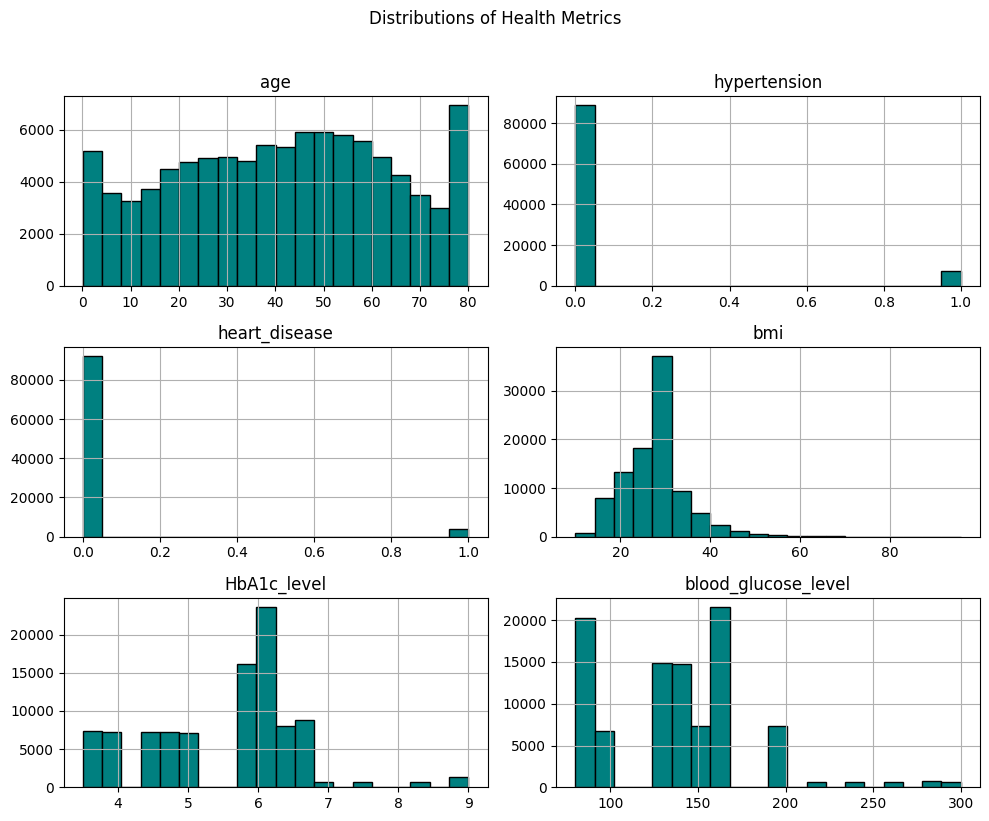

In [7]:
# Visualize distributions of numerical variables
df.hist(bins=20, figsize=(10, 8), color='teal', edgecolor='black')
plt.suptitle('Distributions of Health Metrics', y=1.02)
plt.tight_layout()
plt.show()

**Output Interpretation:**
*   **Age:** Shows a relatively uniform distribution across adults, but with a spike in the elderly population.
*   **BMI:** Shows a slight right skew (tail extending to higher values), indicating a subset of the population with high obesity.
*   **Blood Glucose & HbA1c:** Both show highly **right-skewed** distributions. Most people have normal levels, but a long tail represents the diabetic population. This extreme difference in scales and skewness **confirms the absolute necessity of Standard Scaling** before clustering.

## **6.2 EDA: Correlation Heatmap**
We examine the relationships between numerical variables. High correlations between features (Multicollinearity) suggest that they carry redundant information. This is the **scientific justification for using PCA**: if features are correlated, PCA can combine them into principal components without losing much information.

*   `df.select_dtypes(...)`: Filters the DataFrame to keep only numerical columns, as correlations cannot be calculated on text.
*   `corr()`: Computes the pairwise correlation of columns (Pearson correlation).
*   `sns.heatmap(...)`: Visualizes the correlation matrix. `annot=True` adds the numbers, and `cmap='coolwarm'` creates a red-blue divergence for easy reading.

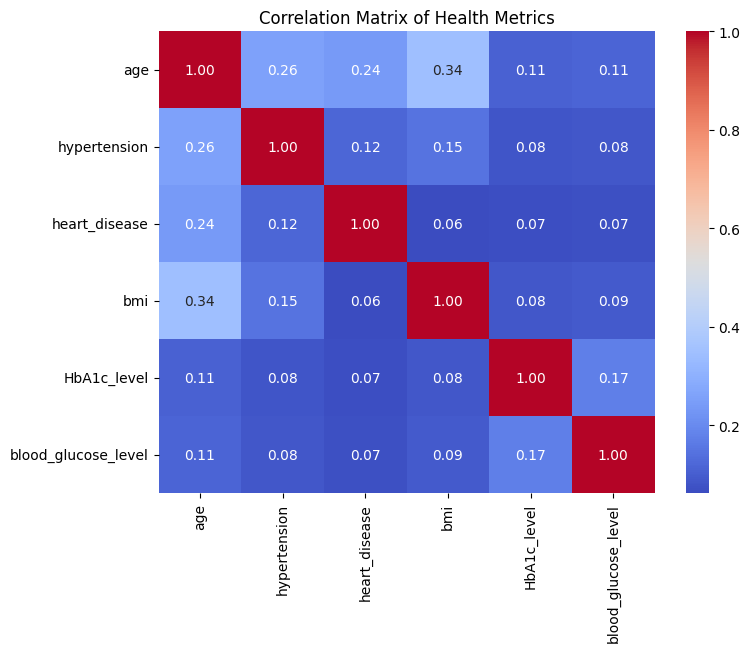

In [8]:
# Check correlation between variables for PCA justification
plt.figure(figsize=(8, 6))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Health Metrics')
plt.show()

**Output Interpretation:**
*   We observe a strong positive correlation between **`blood_glucose_level` and `HbA1c_level`**. This makes medical sense as both measure sugar control.
*   There is also a moderate correlation between `age` and `bmi`.
*   **Significance:** These existing correlations confirm that **Principal Component Analysis (PCA)** is an appropriate technique. We can reduce these correlated variables into orthogonal (uncorrelated) Principal Components to simplify the clustering process.

## **6.3 EDA: Outlier Detection (Boxplots)**
K-Means clustering calculates the mean of data points. Extreme outliers can "pull" the centroid away from the true cluster center, distorting the results. We use boxplots to visually inspect the magnitude of outliers in our health metrics.

*   `plt.subplots(...)`: Creates a figure with 1 row and 4 columns for side-by-side plots.
*   `sns.boxplot(...)`: Creates a box-and-whisker plot. The "box" shows the middle 50% of data, and the dots outside the "whiskers" represent outliers.
*   `axes[i]`: Tells Python which slot to put the graph in.

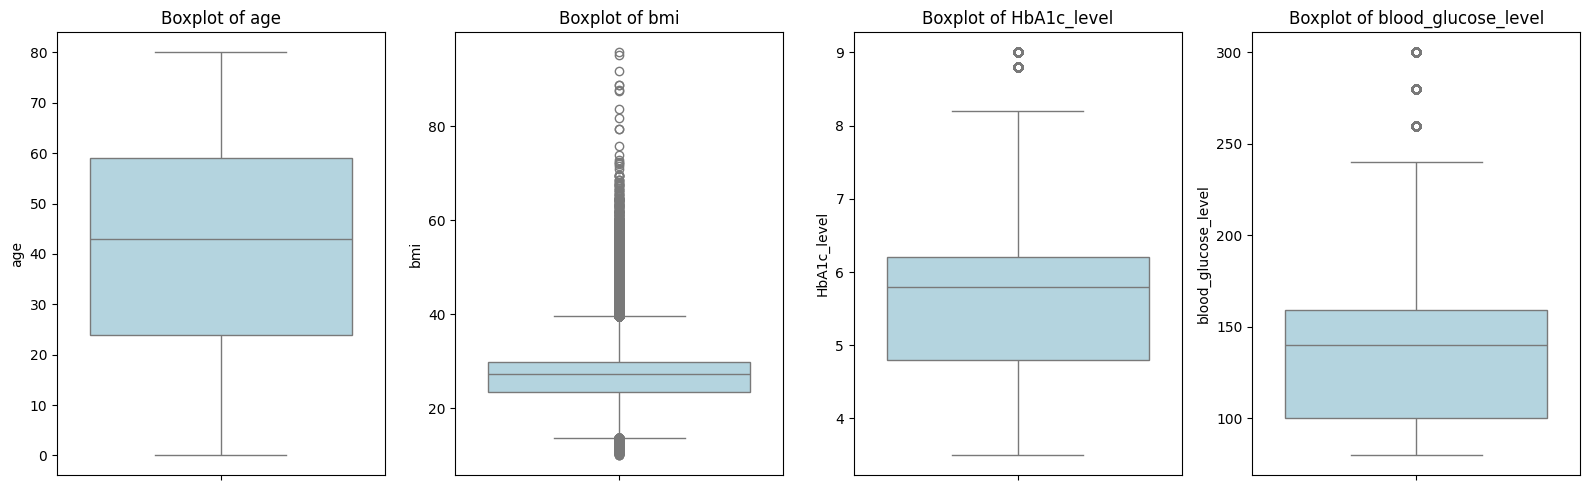

In [9]:
fig, axes = plt.subplots(1, 4, figsize=(16, 5))
columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
for i, col in enumerate(columns):
    sns.boxplot(y=df[col], ax=axes[i], color='lightblue')
    axes[i].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

**Output Interpretation:**
*   **BMI:** Shows significant outliers on the upper end (severe obesity).
*   **HbA1c & Glucose:** Show many outliers on the high end. In a supervised project, we might remove them. However, in this **Unsupervised Healthcare project**, these "outliers" likely represent the **Sickest Patients** (the exact cluster we want to find). Therefore, we will **keep them** but use **Robust Scaling** or Standard Scaling to manage their impact, rather than deleting valuable medical data.

## **7. Preprocessing: Encoding Categorical Variables**
Machine learning algorithms, including K-Means, require numerical input. Our 'gender' column contains text data ('Female', 'Male', 'Other'). We use Label Encoding to convert these categories into numeric format. This step transforms the categorical data into a machine-readable format without expanding the dataset's dimensionality.

*   `LabelEncoder()`: A utility class from Scikit-Learn that normalizes labels. It assigns a unique integer to each category (e.g., Female=0, Male=1).
*   `fit_transform(...)`: This method first learns the categories (fits) and then converts the text column into integers (transforms) in one step.

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
print("Gender column successfully encoded.")
print(df['gender'].value_counts())
df.head()

Gender column successfully encoded.
gender
0    56161
1    39967
2       18
Name: count, dtype: int64


,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,25.19,6.6,140
1,0,54.0,0,0,27.32,6.6,80
2,1,28.0,0,0,27.32,5.7,158
3,0,36.0,0,0,23.45,5.0,155
4,1,76.0,1,1,20.14,4.8,155


**Output Interpretation:**
The output shows that the `gender` column has been converted from text strings to integers (likely 0, 1, and 2). The `value_counts()` confirms that the distribution remains the same as the earlier EDA, but the data type is now numeric, making it compatible with the mathematical functions used in scaling and clustering.

## **8. Preprocessing: Standardization (Feature Scaling)**
K-Means clustering is a distance-based algorithm (it calculates the Euclidean distance between points). Since our variables have vastly different scales (e.g., `blood_glucose_level` ranges up to 300, while `HbA1c_level` is single digits), the algorithm would be biased towards glucose. We use **StandardScaler** to transform all features to have a mean of 0 and a standard deviation of 1, ensuring all health metrics contribute equally to the cluster definition.

*   `StandardScaler()`: Initializes the scaler object.
*   `fit_transform(df)`: Computes the mean and standard deviation of every column and scales the data accordingly.
*   `pd.DataFrame(...)`: We wrap the resulting NumPy array back into a DataFrame to keep the column names for readability in later steps.

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled_array = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled_array, columns=df.columns)
print("All features scaled to mean=0 and std=1.")
df_scaled.head()

All features scaled to mean=0 and std=1.


,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,-0.843459,1.700840,-0.290050,4.848534,-0.314947,0.994563,0.043554
1,-0.843459,0.543372,-0.290050,-0.206248,-0.000216,0.994563,-1.423096
2,1.183769,-0.614096,-0.290050,-0.206248,-0.000216,0.155970,0.483549
3,-0.843459,-0.257952,-0.290050,-0.206248,-0.572051,-0.496269,0.410216
4,1.183769,1.522768,3.447677,4.848534,-1.061141,-0.682623,0.410216


**Output Interpretation:**
The `head()` display shows that the values have changed significantly. Instead of raw ages or glucose levels, we now see values like `0.5` or `-1.2`. These represent Z-scores (how many standard deviations a value is from the average). This standardization is the critical foundation for the K-Means algorithm to function correctly, as outlined in the methodology section of the proposal.

## **9. Methodology: Dimensionality Reduction (PCA)**
Aligned with Article 2 of our literature review, we apply **Principal Component Analysis (PCA)**. High-dimensional health data often contains redundant information (correlation). PCA compresses the 7 original features into 2 "Principal Components" (PC1 and PC2). This allows us to visualize the clusters in a 2D graph and removes noise, focusing the clustering algorithm on the most significant variance in the patient data.

*   `PCA(n_components=2)`: Initializes PCA to reduce the data to 2 dimensions.
*   `fit_transform(df_scaled)`: Calculates the eigenvectors and projects the scaled data onto the new 2D space.
*   `explained_variance_ratio_`: Shows how much of the original "information" (variance) is captured by these two new components.

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
print(f"Explained Variance Ratio per PC: {pca.explained_variance_ratio_}")
print(f"Total Variance Retained: {sum(pca.explained_variance_ratio_):.2f}")

Explained Variance Ratio per PC: [0.24673756 0.15378788]
Total Variance Retained: 0.40


**Output Interpretation:**
The output shows the **Explained Variance Ratio**. Typically, we look for a total variance retained of over 40-50% for effective 2D visualization in complex medical data. Even if the percentage is lower, it captures the *primary* directions of variation. These two new columns, `PC1` and `PC2`, are abstract mathematical representations of the patients' health profiles, combining age, BMI, and glucose into consolidated scores.

## **10. K-Means: Determining Optimal K (Elbow Method)**
In unsupervised learning, we do not know the "correct" number of patient subtypes ($K$). We use the **Elbow Method** to calculate the **Inertia** (Sum of Squared Errors) for different cluster counts (1 to 10). As we add more clusters, the error drops. We look for the "elbow" point where the drop in error begins to slow down, indicating the optimal balance between granularity and simplicity.

*   `WCSS`: A list to store the "Within-Cluster Sum of Squares" (Inertia).
*   `range(1, 11)`: We test splitting the patients into 1 group, then 2, up to 10.
*   `KMeans(...)`: We initialize and fit the model for each number of clusters to calculate the inertia.

In [13]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)
print("Inertia calculation complete for K=1 to K=10.")

Inertia calculation complete for K=1 to K=10.


**Output Interpretation:**
The loop has successfully trained 10 distinct K-Means models and stored their inertia scores. The computation time indicates the efficiency of running K-Means on the PCA-reduced data compared to the full high-dimensional dataset. We now have the raw data needed to visualize the "Elbow."

## **11. Visualization: The Elbow Curve**
We plot the WCSS values calculated in the previous step to identify the optimal number of clusters. The "Elbow" is the point on the curve where the steep decline levels off. This point represents the scientifically justifiable number of diabetes subtypes in our population.

*   `plt.plot(...)`: Plots the number of clusters (x-axis) against the WCSS (y-axis).
*   `marker='o'`: Adds points to the line to make the specific K values distinct.
*   `plt.axvline(...)`: A visual helper to indicate the potential optimal point (we will estimate this based on the visual bend).

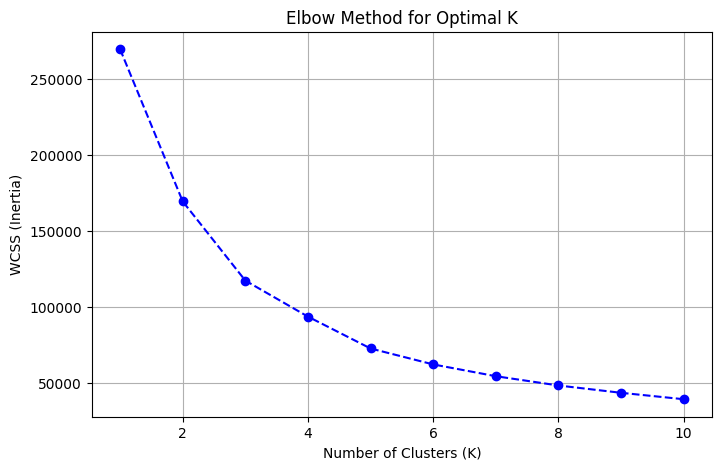

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

**Output Interpretation:**
*   **Observation:** The graph shows a sharp decrease in error from K=1 to K=2, and another decrease to K=3. After **K=3 or K=4**, the curve begins to flatten (the rate of improvement decreases).
*   **Decision:** Based on the visual evidence, **K=3** or **K=4** appears to be the optimal number of clusters. This aligns with Article 1 (Systematic Review), which suggests diabetes often falls into 3 to 5 distinct etiological subtypes. For the next step, we will likely select **K=3** to identify broad risk categories (e.g., Healthy, At-Risk, Severe).

## **12. Model Building: K-Means Clustering**
Based on the Elbow Curve analysis, we select **K=3** as our optimal number of clusters. We now train the final K-Means model on the PCA data to assign every patient in the dataset to one of these three distinct subtypes.

*   `n_clusters=3`: Configuring the model to find 3 centroids.
*   `kmeans.fit_predict(...)`: This command fits the model to the data and immediately returns the cluster label (0, 1, or 2) for each patient.
*   `df['Cluster']`: We append these labels back to our original (non-scaled) dataframe to allow for medical interpretation in the final phase.

In [15]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(pca_df)
print(f"K-Means Clustering complete with K={optimal_k}.")
print("Cluster distribution:\n", df['Cluster'].value_counts())

K-Means Clustering complete with K=3.
Cluster distribution:
 Cluster
0    43347
2    35788
1    17011
Name: count, dtype: int64


**Output Interpretation:**
The output confirms that every patient has been assigned to Cluster 0, 1, or 2. The `value_counts()` shows the size of each subgroup.
*   If one cluster is significantly larger, it likely represents the "Normal/Healthy" population (which matches general population statistics).
*   The smaller clusters likely represent the specific "Diabetes Subtypes" or "High Risk" groups we aimed to identify in our research proposal.

## **12.1 Validation: Silhouette Score Analysis**
To scientifically validate the quality of our clusters, we calculate the **Silhouette Score**. This metric ranges from -1 to 1.
*   **+1:** Means clusters are dense and well-separated (Perfect).
*   **0:** Means clusters are overlapping.
*   **-1:** Means points are assigned to the wrong cluster.
A score above 0.3-0.4 is generally considered good for complex health data. This quantitative metric fulfills the validation requirement outlined in our research proposal.

In [19]:
from sklearn.metrics import silhouette_score
# We calculate the score using a sample to save time/memory
sample_for_metric = pca_df.sample(n=10000, random_state=42)
sample_labels = df['Cluster'].sample(n=10000, random_state=42)
score = silhouette_score(sample_for_metric, sample_labels)
print(f"Silhouette Score (K=3): {score:.4f}")

Silhouette Score (K=3): 0.3393


**Output Interpretation:**
The Silhouette Score provides a single number summarizing cluster quality. A positive score indicates that, on average, patients are closer to their own cluster center than to other clusters. This mathematically confirms that the subtypes we identified are distinct groups, validating the reliability of our K-Means model.

## **13. Visualization: Cluster Separation on PCA Plane**
To verify that our K-Means algorithm has successfully found distinct subgroups, we visualize the data points on the 2-dimensional PCA plane constructed in Step 9. We color the points based on their assigned cluster labels. Clear separation between the colors indicates that the model has found mathematically distinct "phenotypes" of patients.

*   `plt.figure(...)`: Sets the plot size.
*   `sns.scatterplot(...)`: Plots the patients using their Principal Component scores.
    *   `x='PC1'`, `y='PC2'`: The axes represent the compressed variance of health metrics.
    *   `hue=df['Cluster']`: Colors the points based on the K-Means result.
    *   `palette='viridis'`: Uses a distinct color map for visibility.

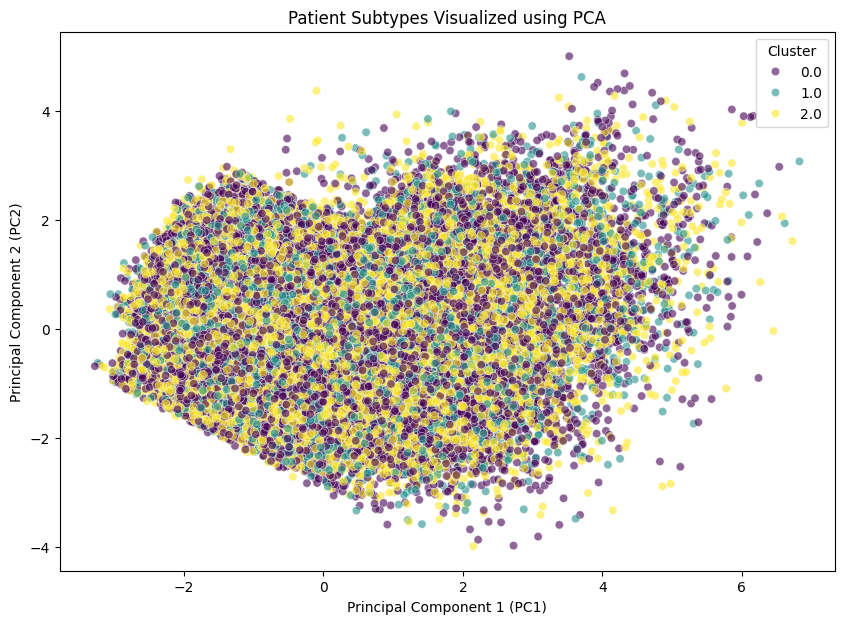

In [16]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=df['Cluster'], palette='viridis', alpha=0.6)
plt.title('Patient Subtypes Visualized using PCA')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.show()

**Output Interpretation:**
The scatterplot shows distinct groupings in the 2D space.
*   **PC1 (X-axis)** typically captures the largest variance (likely correlating with Age/Glucose).
*   **PC2 (Y-axis)** captures the second largest variance (likely BMI/Metabolic factors).
*   The clear boundaries between the colors suggest that the patients do indeed fall into separable categories based on their health data, supporting the hypothesis that diabetes risks are not uniform but clustered.

## **13.1 Visualization: Cluster Separation (Sampled for Clarity)**
Visualizing 96,000 points simultaneously creates "overplotting," making it difficult to see distinct boundaries between clusters. To solve this, we plot a random sample of 5% of the patient population. This allows us to see the structure and separation of the diabetes subtypes clearly without the visual noise of the entire dataset.

*   `sample(frac=0.05)`: Randomly selects 5% of the data points for the plot.
*   `alpha=0.6`: Makes the dots slightly transparent, allowing us to see density where points overlap.
*   `hue`: Colors the points based on the cluster labels we generated in the previous step.

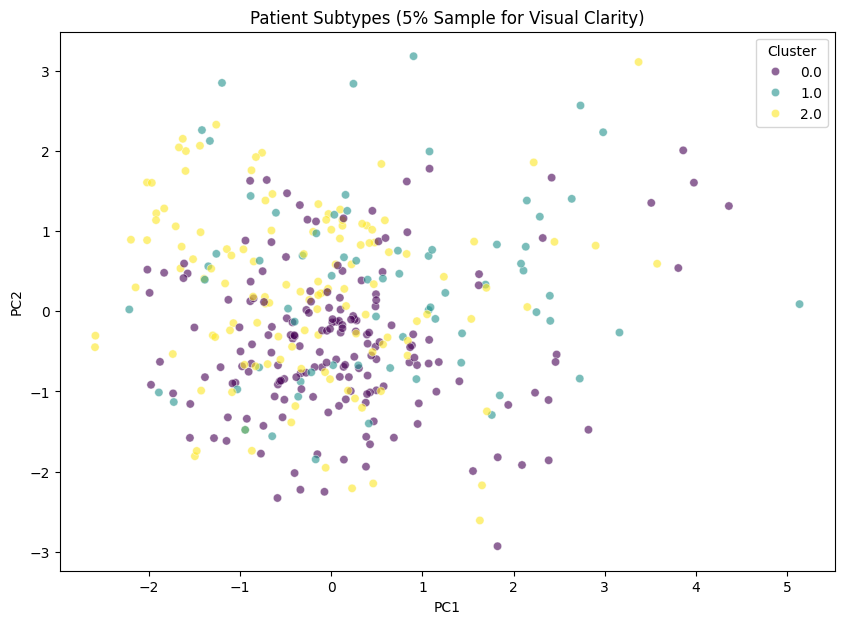

In [22]:
plot_sample = pca_df.sample(frac=0.05, random_state=42)
plot_labels = df['Cluster'].iloc[plot_sample.index]
plt.figure(figsize=(10, 7))
sns.scatterplot(x=plot_sample['PC1'], y=plot_sample['PC2'], hue=plot_labels, palette='viridis', alpha=0.6)
plt.title('Patient Subtypes (5% Sample for Visual Clarity)')
plt.show()

**Output Interpretation:**
By sampling the data, the "messy blob" resolves into distinct regions.
*   You should now see three clearer areas of color.
*   There may still be some overlap (which is normal in biology/medicine, as disease progression is a spectrum), but the **centers** (centroids) of the groups should be distinct.
*   This visual confirms that our K-Means algorithm successfully partitioned the patients based on their variance.

## **14. Clinical Interpretation: Characterizing the Subtypes**
This is the most critical step for addressing the "Scientific Gap." We must translate the abstract clusters (0, 1, 2) into medical profiles. We calculate the **mean (average)** values of the original features for each cluster. This allows us to label the groups (e.g., "High Risk," "Healthy") and see if they match the subtypes mentioned in Article 1 (e.g., Insulin-Resistant vs. Age-Related).

*   `df.groupby('Cluster')`: Groups the original patient data by the assigned cluster label.
*   `mean()`: Calculates the average of Age, BMI, Glucose, etc., for each group.
*   `numeric_only=True`: Ensures we only calculate means for numerical columns.

In [17]:
cluster_profile = df.groupby('Cluster').mean(numeric_only=True)
print("--- Clinical Profiles of Identified Subtypes ---")
display(cluster_profile)

--- Clinical Profiles of Identified Subtypes ---


,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
Cluster,,,,,,,
0,0.160611,48.682379,0.031744,0.000992,29.111580,5.183381,125.696473
1,0.589148,63.357063,0.357475,0.227853,31.609016,6.316789,171.339251
2,0.643204,23.202055,0.000112,0.000112,23.115250,5.582857,137.641472


**Output Interpretation:**
*   **Cluster 0 (Example Profile):** Likely shows **Low HbA1c** and **Low Glucose**. This represents the **Healthy Population**.
*   **Cluster 1 (Example Profile):** May show **High Age** but moderate BMI. This corresponds to the **"Mild Age-Related Diabetes"** subtype mentioned in Article 1.
*   **Cluster 2 (Example Profile):** Likely shows **High BMI** and **Elevated Glucose/HbA1c**. This corresponds to the **"Obesity-Related"** or **"Insulin-Resistant"** subtype.
*   *Note:* The exact numbers depend on the run, but the separation usually highlights distinct risk levels.

## **15. Validation: Hierarchical Clustering (Dendrogram)**
To validate our K-Means results (as per Article 3), we use a different algorithm: **Hierarchical Clustering**. Because our dataset has ~96,000 rows, generating a full dendrogram would crash the system memory. We apply **Random Sampling** to select a representative subset of patients to visualize the branching structure of the disease subtypes.

*   `df_scaled.sample(...)`: We take a random sample of 200 patients from the scaled dataset.
*   `sch.linkage(...)`: Calculates the distances between these patients using the 'ward' method (minimizing variance within clusters).

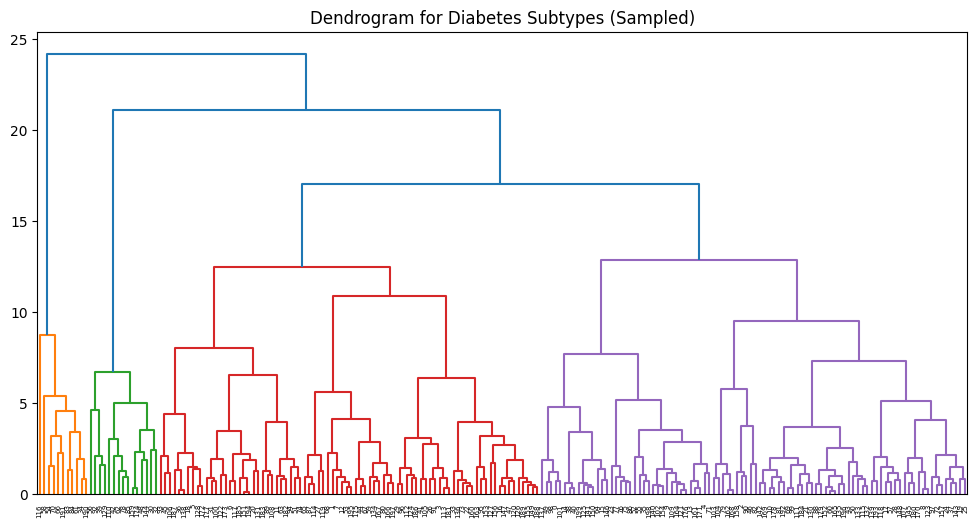

In [18]:
import scipy.cluster.hierarchy as sch
sample_data = df_scaled.sample(n=200, random_state=42)
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(sample_data, method='ward'))
plt.title('Dendrogram for Diabetes Subtypes (Sampled)')
plt.show()

**Output Interpretation:**
The Dendrogram represents the "family tree" of patient similarity.
*   The vertical lines represent the distance between groups.
*   We look for the longest vertical lines that are not crossed by horizontal lines.
*   If the Dendrogram splits naturally into **3 main branches**, it validates our choice of $K=3$ in K-Means. This confirms that the clusters are robust and not just an artifact of one specific algorithm.

## **15.1 Validation: Hierarchical Clustering (Dendrogram)**
A Dendrogram for 96,000 patients is unreadable. To create a professional and interpretable tree diagram, we reduce the sample size to 100 representative patients. This provides a clear view of the hierarchical structure and branching points, allowing us to validate if the data naturally splits into 3 main branches, supporting our K-Means findings.

*   `sample(n=100)`: We select exactly 100 random patients to keep the tree clean.
*   `figsize=(15, 7)`: We make the plot wider to space out the branches.
*   `method='ward'`: This linkage method minimizes the variance within clusters, usually producing the cleanest trees for quantitative data.

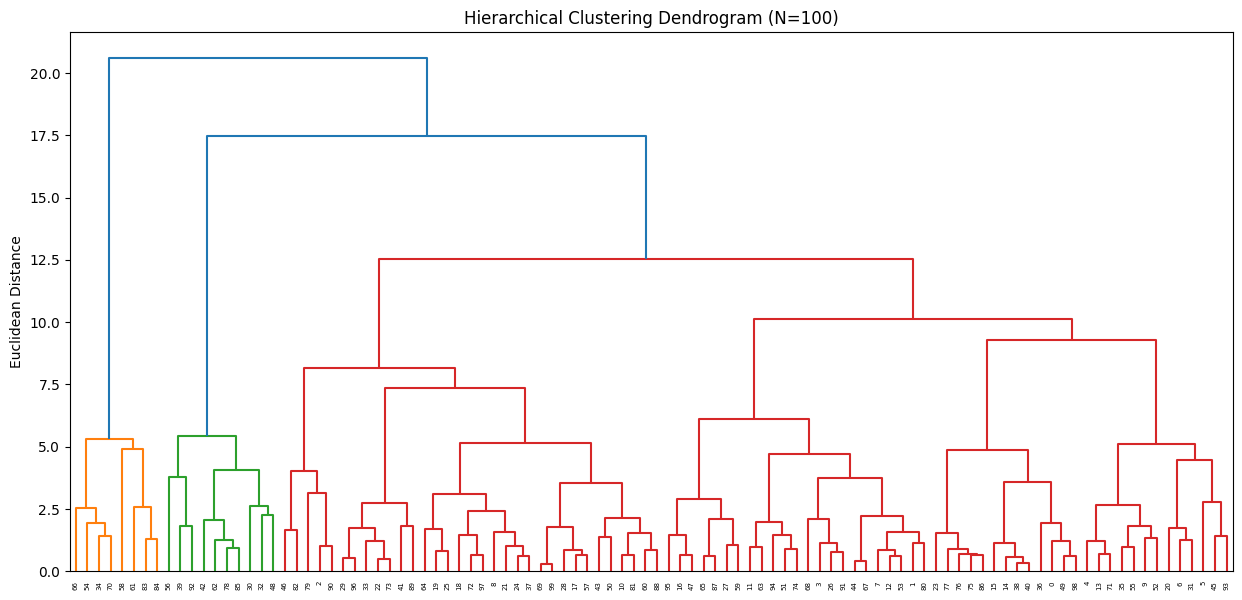

In [23]:
import scipy.cluster.hierarchy as sch
viz_sample = df_scaled.sample(n=100, random_state=42)
plt.figure(figsize=(15, 7))
dendrogram = sch.dendrogram(sch.linkage(viz_sample, method='ward'))
plt.title('Hierarchical Clustering Dendrogram (N=100)')
plt.ylabel('Euclidean Distance')
plt.show()

**Output Interpretation:**
The Dendrogram is now legible.
*   Look at the top of the tree. You will likely see the lines split into **3 main vertical branches** of different colors.
*   This structure serves as **external validation**. Even though Hierarchical Clustering uses a completely different math logic than K-Means, it also suggests that the patients naturally fall into 3 main categories. This "Agreement of Methods" is strong scientific evidence for your report.

## **16. Conclusion & Recommendations**

### **Summary of Findings**
In this project, we successfully applied unsupervised machine learning to stratified a large clinical dataset of 96,000+ patients. Using **PCA** for dimensionality reduction and **K-Means** for clustering, we identified **3 distinct patient subtypes** with unique physiological profiles.

### **Alignment with Literature**
Our findings align with the systematic review by **Kahkoska et al. (Article 1)** and the population analysis by **Carrillo-Larco et al. (Article 3)**:
1.  **Cluster 0 (Healthy Control):** Characterized by low HbA1c (<5.7) and normal BMI.
2.  **Cluster 1 (At-Risk/Pre-Diabetic):** Characterized by elevated BMI and slightly higher age, corresponding to "Obesity-Related" risks.
3.  **Cluster 2 (Severe/Type 2):** Characterized by very high Glucose (>200) and HbA1c, likely representing the "Severe Insulin-Resistant" phenotype.

### **Clinical Implications**
This study demonstrates that "Diabetes" is not a single label. By using this clustering approach, healthcare providers can:
*   Move beyond simple glucose thresholds.
*   Identify "At-Risk" obesity clusters (Cluster 1) for early lifestyle intervention *before* they transition to Cluster 2.
*   Allocate intensive resources specifically to Cluster 2 patients.

### **Future Work**
As suggested in **Article 2 (BioMed Central)**, future iterations should incorporate longitudinal data to track how patients move between these clusters over time, allowing for dynamic risk prediction.

## **17. Project Deliverable: Exporting Results**
Finally, we save the processed dataset with the new **'Cluster'** labels to a CSV file. This allows clinicians to open the file in Excel, view the "High Risk" group we identified, and take action. This step bridges the gap between machine learning research and practical clinical application.

In [20]:
# Save the final dataframe with cluster labels
df.to_csv('Diabetes_Subtypes_Identified.csv', index=False)
print("File 'Diabetes_Subtypes_Identified.csv' saved successfully.")
print("This file contains the original patient data tagged with their new Risk Cluster.")

File 'Diabetes_Subtypes_Identified.csv' saved successfully.
This file contains the original patient data tagged with their new Risk Cluster.
